In [1]:
from datetime import datetime, timezone, timedelta
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../sdpm_py_util')
import ocn_functions as ocnfuns
import plotting_functions as pltfuns
import atm_functions as atmfuns
import init_funs as initfuns
from get_PFM_info import get_PFM_info
from util_functions import s_coordinate_4
from util_functions import display_timing_info

import pickle
import os
import pprint
import subprocess


/home/mspydell/models/PFM_root/PFM/driver/../sdpm_py_util/ocn_functions.py:25: UserWarning: The seawater library is deprecated! Please use gsw instead.
  import seawater


In [2]:
ocnfuns.mk_LV2_BC_dict_edges('4')

OCN_LV3_BC dict loaded with pickle
interpolating z with normal loops.


PermissionError: [Errno 13] Permission denied: '/scratch/PFM_Simulations/LV4_Forecast/Forc/BC_LV4_tmp_file.pkl'

In [2]:
ocnfuns.mk_LV2_BC_dict('4')

we are remaking the PFM.pkl file...
getting PFM info...
removing PFM info file...
we are not adding tidal forcing as Hycom includes tides.
PFM info was saved as /scratch/PFM_Simulations/PFM_run_info.pkl
OCN_LV3_BC dict loaded with pickle
interpolating z with normal loops.


Traceback (most recent call last):
  File "/home/mspydell/models/PFM_root/PFM/sdpm_py_util/ocn_functions.py", line 6211, in <module>
    globals()[args[1]](*args[2:])
  File "/home/mspydell/models/PFM_root/PFM/sdpm_py_util/ocn_functions.py", line 5312, in mk_LV2_BC_dict
    with open(fn_out,'wb') as fout:
              ^^^^^^
UnboundLocalError: cannot access local variable 'fn_out' where it is not associated with a value


In [5]:
fn_bc3 = '/scratch/PFM_Simulations/LV3_Forecast/Forc/LV3_OCEAN_BC.nc'
fn_gr3 = '/scratch/PFM_Simulations/Grids/GRID_SDTJRE_LV3_rx020.nc'
fn_ic4 = '/scratch/matt/sdtjre_L4/IC_LV4_2016121100_tide_DK_4river_Nz10.nc'
fn_gr4 = '/scratch/PFM_Simulations/Grids/GRID_SDTJRE_LV4_ROTATE_rx020_hplus020_DK_4river_otaymk.nc'
fn_clm4 = '/scratch/matt/sdtjre_L4/ocean_clm_20180101_DK_4river_Nz10.nc'
fn_bc4 = '/scratch/matt/sdtjre_L4/BC_LV4_20161207_20170804_Nz10_dye.nc'
fn_nud4 = '/scratch/matt/sdtjre_L4/ocean_nudcoef_DK_4river_10day_Nz10.nc'
fn_tr4 = '/scratch/matt/sdtjre_L4/river_tracer_4river_NADB2017_0.nc'

bcl3 = netCDF4.Dataset(fn_bc3)
bcl4 = netCDF4.Dataset(fn_bc4)

pprint.pp(bcl3.variables.keys())
pprint.pp(bcl4.variables.keys())


dict_keys(['temp_south', 'salt_south', 'u_south', 'v_south', 'ubar_south', 'vbar_south', 'zeta_south', 'temp_north', 'salt_north', 'u_north', 'v_north', 'ubar_north', 'vbar_north', 'zeta_north', 'temp_west', 'salt_west', 'u_west', 'v_west', 'ubar_west', 'vbar_west', 'zeta_west', 'Vtransform', 'Vstretching', 'theta_s', 'theta_b', 'Tcline', 'hc', 'ocean_time', 'zeta_time', 'v2d_time', 'v3d_time', 'salt_time', 'temp_time', 'Cs_r'])
dict_keys(['theta_s', 'theta_b', 'Tcline', 'hc', 'Cs_r', 'sc_r', 'Cs_w', 'sc_w', 'zeta_time', 'v2d_time', 'v3d_time', 'salt_time', 'temp_time', 'zeta_south', 'zeta_north', 'zeta_west', 'ubar_south', 'ubar_north', 'ubar_west', 'vbar_south', 'vbar_north', 'vbar_west', 'u_south', 'u_north', 'u_west', 'v_south', 'v_north', 'v_west', 'temp_south', 'temp_north', 'temp_west', 'salt_south', 'salt_north', 'salt_west', 'dye_north_01', 'dye_north_02', 'dye_south_01', 'dye_south_02', 'dye_west_01', 'dye_west_02', 'dye_time'])


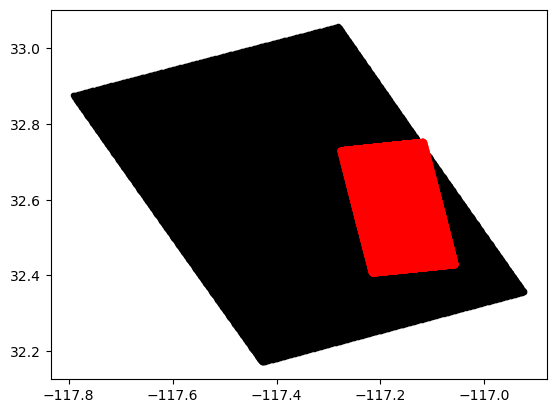

In [6]:

gr3 = netCDF4.Dataset(fn_gr3)
gr4 = netCDF4.Dataset(fn_gr4)

fig, ax = plt.subplots()
p1=ax.plot(gr3['lon_rho'][:],gr3['lat_rho'][:],'k.')
p1=ax.plot(gr4['lon_rho'][:],gr4['lat_rho'][:],'r.')


In [31]:
t_dye = bcl4['dye_time'][:]
d1_n = bcl4['dye_south_02'][:]


print(t_dye)
print(d1_n[:,1:10,1:10])


[6550.5 6790.5]
[[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0.]]]


In [88]:
clm4 = netCDF4.Dataset(fn_clm4)
pprint.pp(clm4.variables.keys())

d1 = clm4['dye_01'][:]
td1 = clm4['dye_time'][:]
print(td1)
print(clm4['temp_time'][:])
print(clm4['salt_time'][:])
print(np.shape(d1))

print(d1[0,-1,0,:])
print(clm4['salt'][1,-1,300,:])
print(clm4['temp'][1,-1,300,:])
print(clm4['Vtransform'][:])
print(clm4['Vstretching'][:])
print(clm4['theta_s'][:])
print(clm4['theta_b'][:])
print(clm4['Tcline'][:])
print(clm4['hc'][:])


dict_keys(['spherical', 'Vtransform', 'Vstretching', 'theta_s', 'theta_b', 'Tcline', 'hc', 'Cs_r', 'sc_r', 'Cs_w', 'sc_w', 'temp_time', 'salt_time', 'temp', 'salt', 'dye_time', 'dye_01', 'dye_02'])
[6544.5 6940.5]
[6544.5 6940.5]
[6544.5 6940.5]
(2, 10, 1142, 486)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0

In [46]:
nud4 = netCDF4.Dataset(fn_nud4)
pprint.pp(nud4.variables.keys())
print(np.shape(nud4['temp_NudgeCoef'][:]))
print(nud4['temp_NudgeCoef'][0,500,:])
print(nud4['salt_NudgeCoef'][0,500,:])
print(nud4['tracer_NudgeCoef'][0,500,:])

dict_keys(['spherical', 'lat_rho', 'lon_rho', 'temp_NudgeCoef', 'salt_NudgeCoef', 'tracer_NudgeCoef'])
(10, 1142, 486)
[-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -

In [48]:
ic4 = netCDF4.Dataset(fn_ic4)
pprint.pp(ic4.variables.keys())


dict_keys(['spherical', 'Vtransform', 'Vstretching', 'theta_s', 'theta_b', 'Tcline', 'hc', 'Cs_r', 'sc_r', 'Cs_w', 'sc_w', 'ocean_time', 'salt', 'temp', 'u', 'ubar', 'v', 'vbar', 'zeta', 'sand_01', 'sandfrac_01', 'sandmass_01', 'bed_thickness', 'bed_age', 'bed_porosity', 'bed_biodiff', 'grain_diameter', 'grain_density', 'settling_vel', 'erosion_stress', 'ripple_length', 'ripple_height', 'dmix_offset', 'dmix_slope', 'dmix_time'])


dict_keys(['theta_s', 'theta_b', 'Tcline', 'hc', 'Cs_r', 'sc_r', 'Cs_w', 'sc_w', 'river', 'river_time', 'river_Xposition', 'river_Eposition', 'river_direction', 'river_Vshape', 'river_transport', 'river_flag', 'river_temp', 'river_salt', 'river_dye_01', 'river_dye_02'])
(9,)
[1.0 -- -- -- -- -- -- -- --]
(9457,)
(9,)
[433. 433. 433. 433. 433. 337. 464. 464. 439.]
[614. 615. 613. 616. 612.  76. 961. 962. 779.]
(9,)
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
(10, 9)
(9457, 9)
(9,)
[3. 3. 3. 3. 3. 3. 3. 3. 3.]
(9457, 10, 9)
[0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7]
[[0.25 0.25 0.25 0.25 0.25 0.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25 0.25 0.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25 0.25 0.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25 0.25 0.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25 0.25 0.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25 0.25 0.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25 0.25 0.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25 0.25 0.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25 0.25 0.   0.   0.   0.  ]
 [0.25 0.25 0

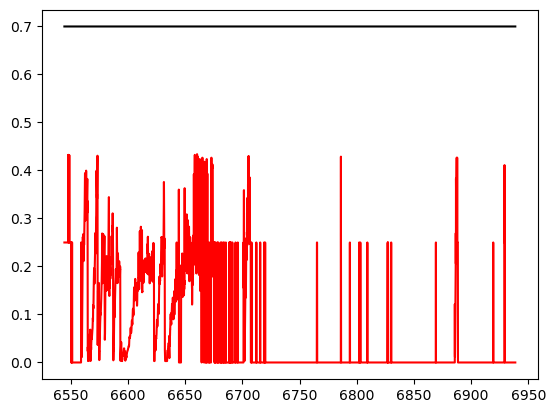

In [87]:
tr4 = netCDF4.Dataset(fn_tr4)
gr4 = netCDF4.Dataset(fn_gr4)
pprint.pp(tr4.variables.keys())
print(np.shape(tr4['river'][:]))
print(tr4['river'][:])
print(np.shape(tr4['river_time'][:]))
print(np.shape(tr4['river_Xposition'][:]))
print(tr4['river_Xposition'][:])
print(tr4['river_Eposition'][:])
print(np.shape(tr4['river_direction'][:]))
print(tr4['river_direction'][:])
print(np.shape(tr4['river_Vshape'][:]))
#print(tr4['river_Vshape'][:])
print(np.shape(tr4['river_transport'][:]))
print(np.shape(tr4['river_flag'][:]))
print(tr4['river_flag'][:])
print(np.shape(tr4['river_temp'][:]))
print(tr4['river_dye_01'][-1,:,5])
print(tr4['river_dye_02'][0,:,:])

fig, ax = plt.subplots()
p1=ax.plot(tr4['river_time'][:],tr4['river_dye_01'][:,0,5],'k')
p1=ax.plot(tr4['river_time'][:],tr4['river_dye_02'][:,0,0],'r')


In [ ]:

fig, ax = plt.subplots()
p0=ax.imshow(gr4['mask_rho'], interpolation='none',origin='lower')
p1=ax.plot(tr4['river_Xposition'][:],tr4['river_Eposition'][:],'ro')



In [ ]:

fig, ax = plt.subplots()
p0=ax.imshow(d1_n[1,:,:], interpolation='none',origin='lower')
fig.colorbar(p0, ax=ax,location='right')
plt.axis('auto')
